### Carregando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

### Carregando a Base

In [ ]:
df = pd.read_csv("dataset.csv")
df.head()

,id,gender,monthly_income,age,beauty,games,clothes,car,alcoholic_beverages
0,91096,female,1239,20,0.116655,0.000000,0.402184,0.0,0.481161
1,21110,female,5486,32,0.331527,0.000000,0.575103,0.0,0.093370
2,22625,female,1376,19,0.003400,0.000000,0.309825,0.0,0.686776
3,36520,male,565,18,0.000000,0.438465,0.000000,0.0,0.561535
4,10499,female,1194,19,0.000000,0.818816,0.017606,0.0,0.163578


### Pré-processamento

In [ ]:
df['gender']  = pd.np.where(df['gender'] == 'female',1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[:,df.columns != 'id'].describe()

,gender,monthly_income,age,beauty,games,clothes,car,alcoholic_beverages
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.568571,4364.622857,35.060000,0.120538,0.179729,0.354254,0.019895,0.325585
std,0.495985,3195.509901,14.963158,0.153360,0.308719,0.219804,0.042392,0.224299
min,0.000000,501.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1055.250000,19.000000,0.000000,0.000000,0.089178,0.000000,0.100182
50%,1.000000,4663.000000,38.000000,0.040396,0.000000,0.427315,0.000000,0.364374
75%,1.000000,6905.000000,49.000000,0.229587,0.367643,0.515010,0.007970,0.528095
max,1.000000,10000.000000,60.000000,0.499237,0.899899,0.690716,0.198250,0.699033


In [ ]:
x = df.loc[:,df.columns != 'id'].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

### K-Means

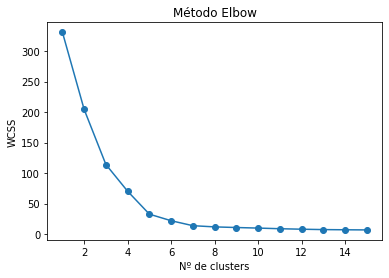

In [ ]:
inertia = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(x_scaled)
    inertia.append((i,kmeans.inertia_,))

plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="o")
plt.title('Método Elbow')
plt.xlabel('Nº de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
numero_de_clusters = 5
km = KMeans( n_clusters=numero_de_clusters, init='k-means++' , n_init=500,random_state=1234)

In [ ]:
y_predicted = km.fit_predict(x_scaled)

In [ ]:
pca_breast = PCA(n_components=2)
pcas = pca_breast.fit_transform(x_scaled)

In [ ]:
ds_pca = pd.DataFrame(data = pcas
             , columns = ['PCA1', 'PCA2'])

In [ ]:
ds_pca['cluster_kmeans'] = y_predicted

[Text(0.5, 1.0, 'Clusters - K-Means')]

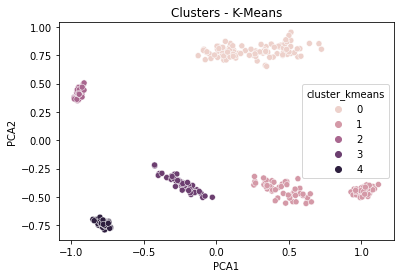

In [ ]:
sns.scatterplot(x=ds_pca['PCA1'], y=ds_pca['PCA2'], hue=ds_pca['cluster_kmeans']).set(title='Clusters - K-Means')

### DBSCAN

In [ ]:
# Creating DBSCAN object and defining clusters for each data point
# NOTE: Noise points (outliers) are assigned to "cluster -1"
dbscan = DBSCAN(min_samples=20, eps=0.2)
cluster_dbscan = dbscan.fit_predict(x_scaled)

In [ ]:
ds_pca['cluster_dbscan'] = ''
ds_pca['cluster_dbscan'] = cluster_dbscan
ds_pca['cluster_dbscan'] = ds_pca['cluster_dbscan'].astype(str)

[Text(0.5, 1.0, 'Clusters - DBSCAN')]

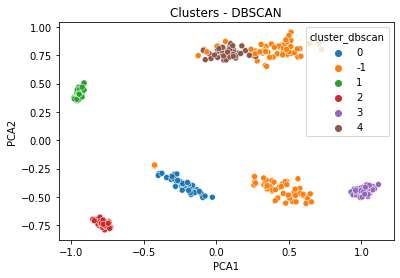

In [ ]:
sns.scatterplot(x=ds_pca['PCA1'], y=ds_pca['PCA2'], hue=ds_pca['cluster_dbscan']).set(title='Clusters - DBSCAN')